# üì• Importa√ß√£o das Bibliotecas

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data
import treino

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import metrics #accuracy measure

# üìä Carregar e Inspecionar os Dados

In [46]:
# Carregar os dados
df = pd.read_csv('Data/bank.csv')
#df = pd.read_csv('/home/rafa/Secret√°ria/AA/AA_TP1/Data/bank.csv')

# Exibir as primeiras linhas
print(df.head())

# Verificar valores ausentes
print(df.isnull().sum())

# Estat√≠sticas b√°sicas
print(df.describe())

# Distribui√ß√£o da vari√°vel alvo
print(df['deposit'].value_counts())

# Tipos de dados
print(df.dtypes)

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
age          0
job          0
marital      0
education    0
default      0
balance      0
housing  

# üìä Visualiza√ß√£o dos Dados

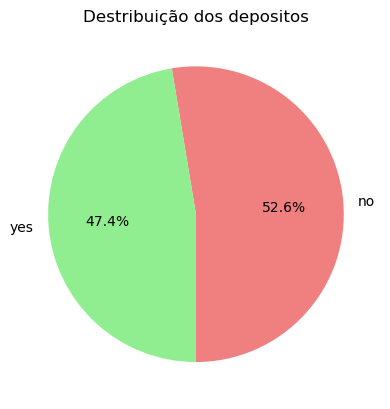

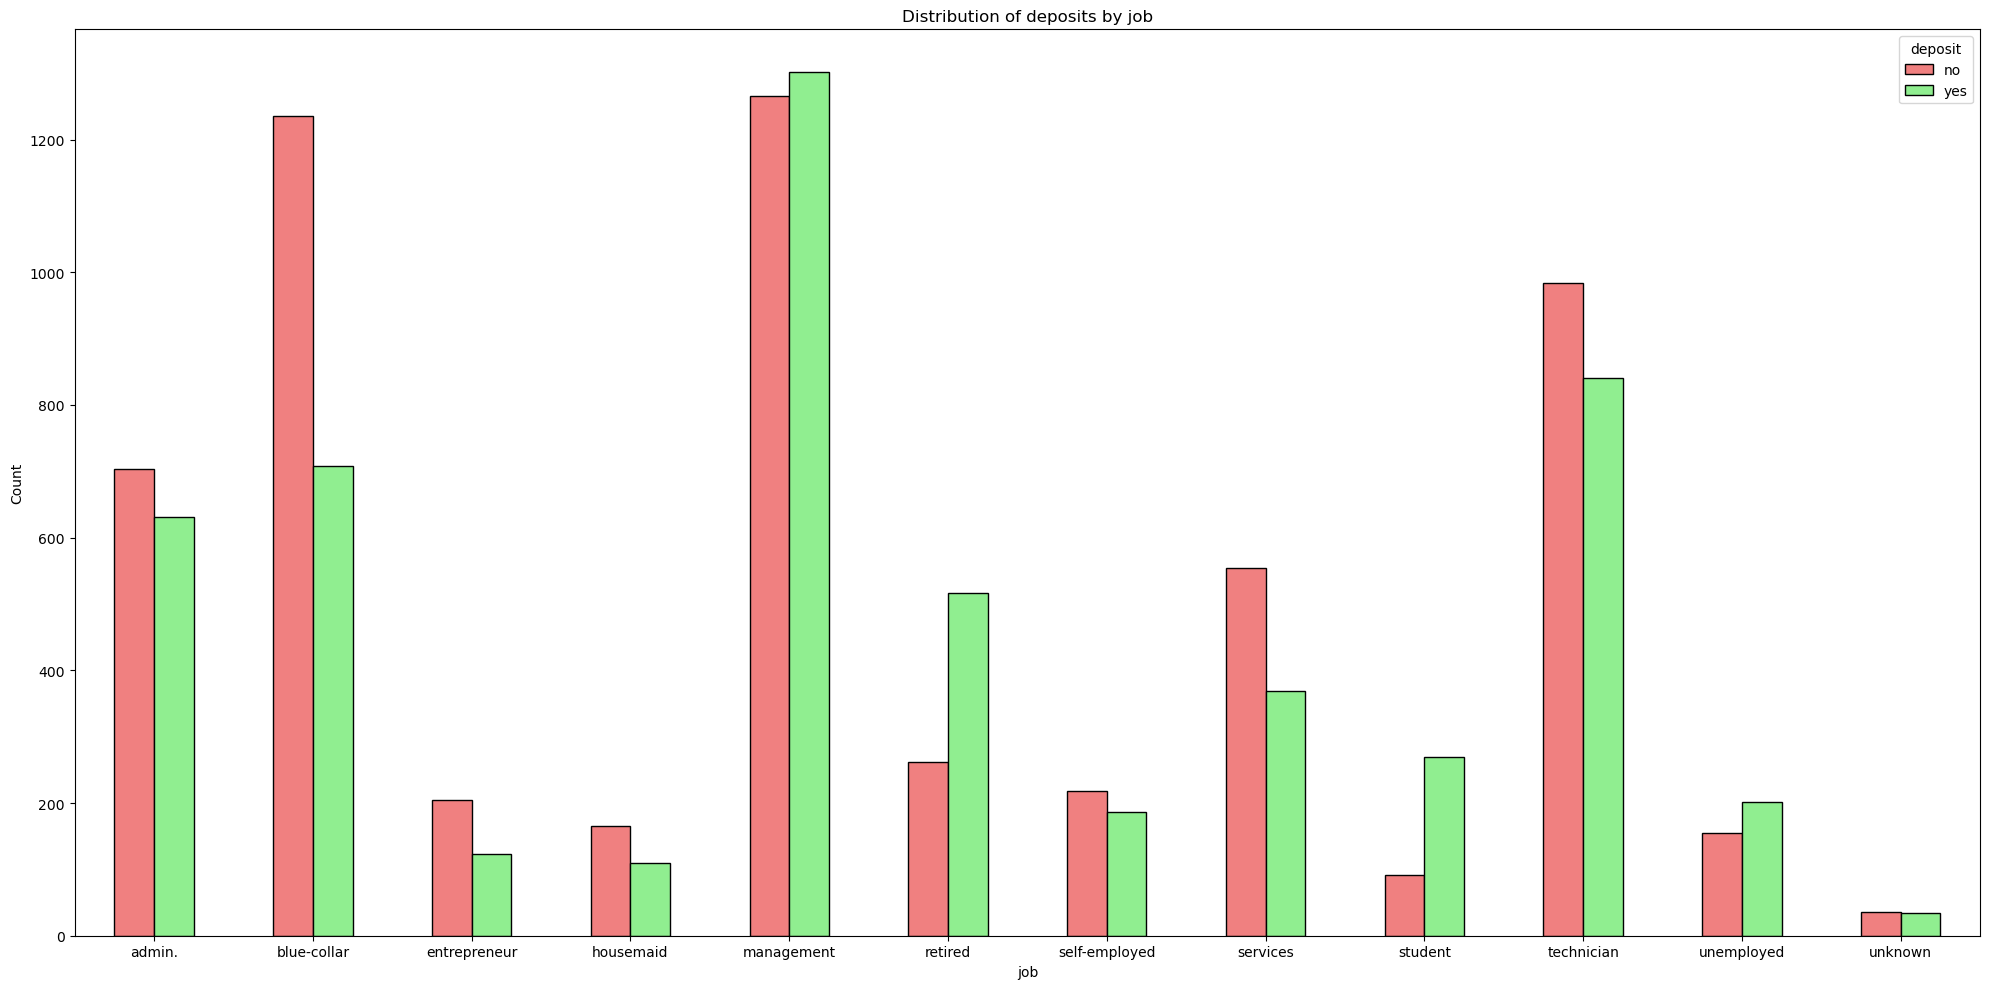

/home/rafa/Secret√°ria/AA/AA_TP1/data.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([col, 'deposit']).size().unstack().plot(


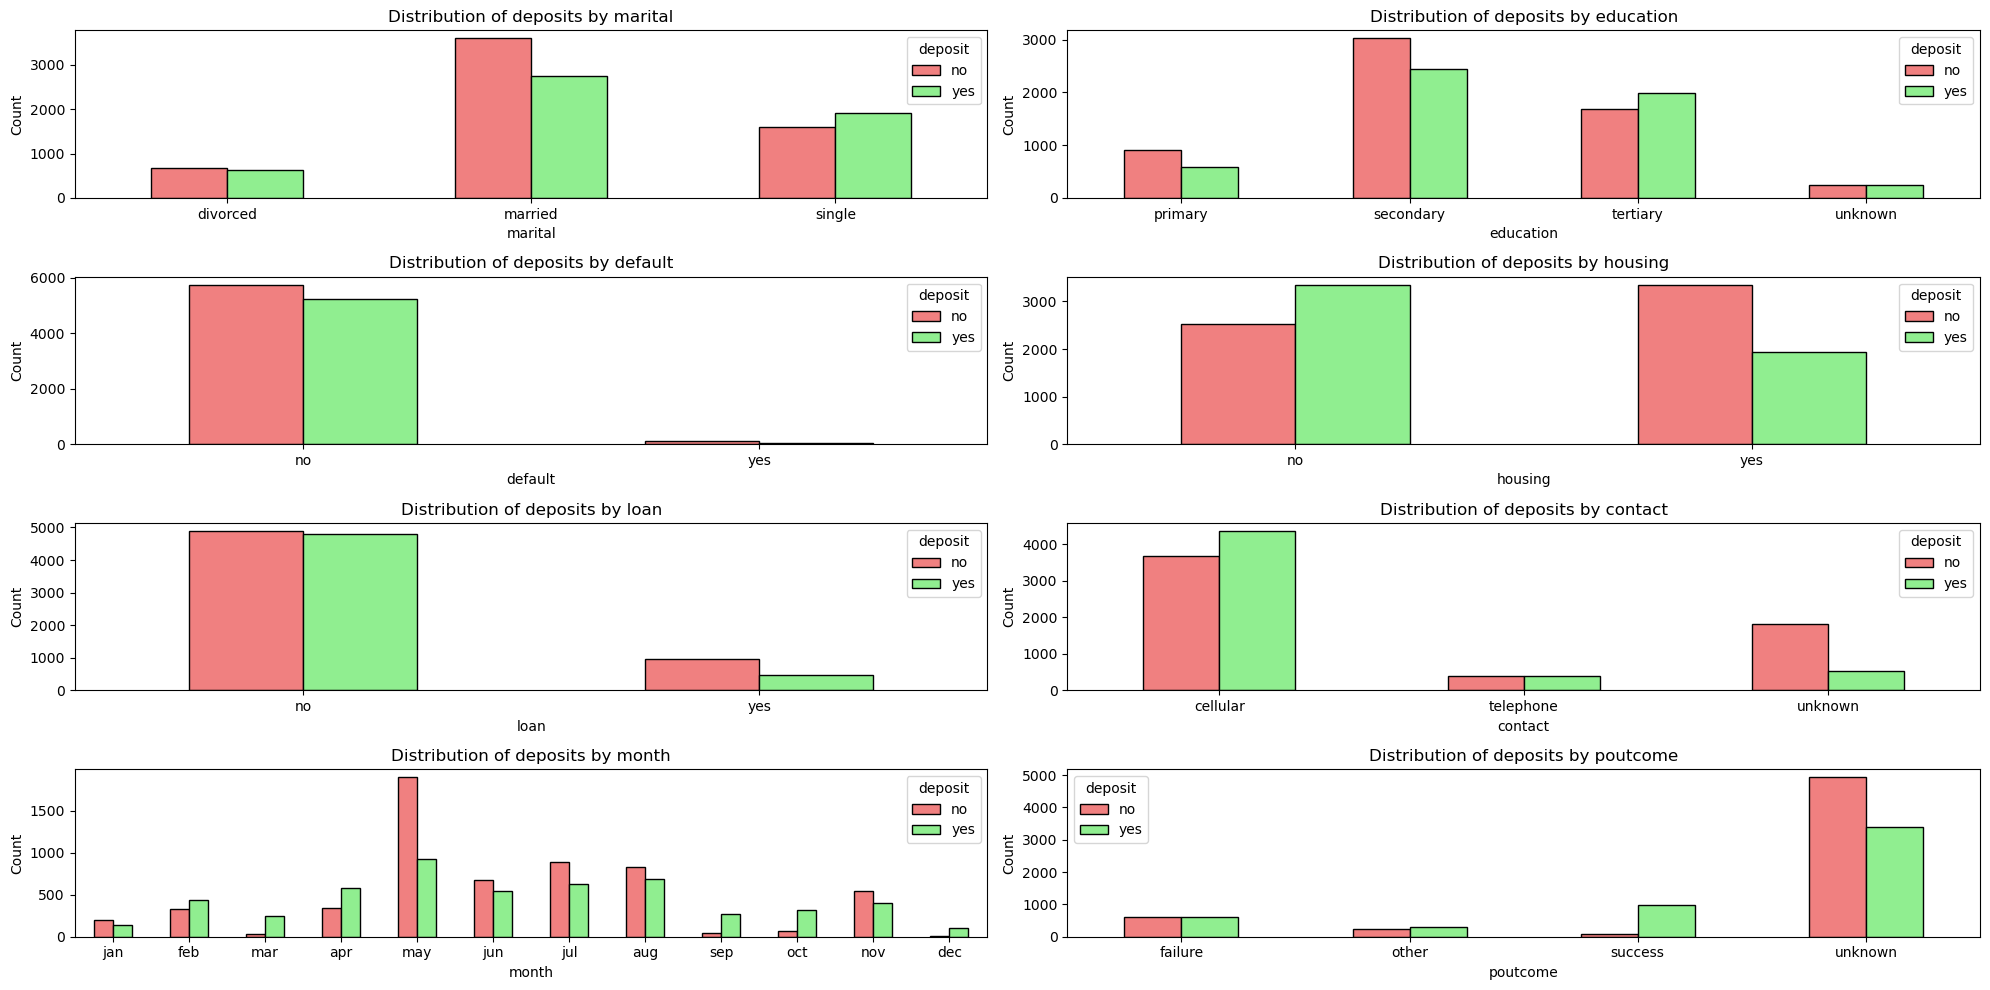

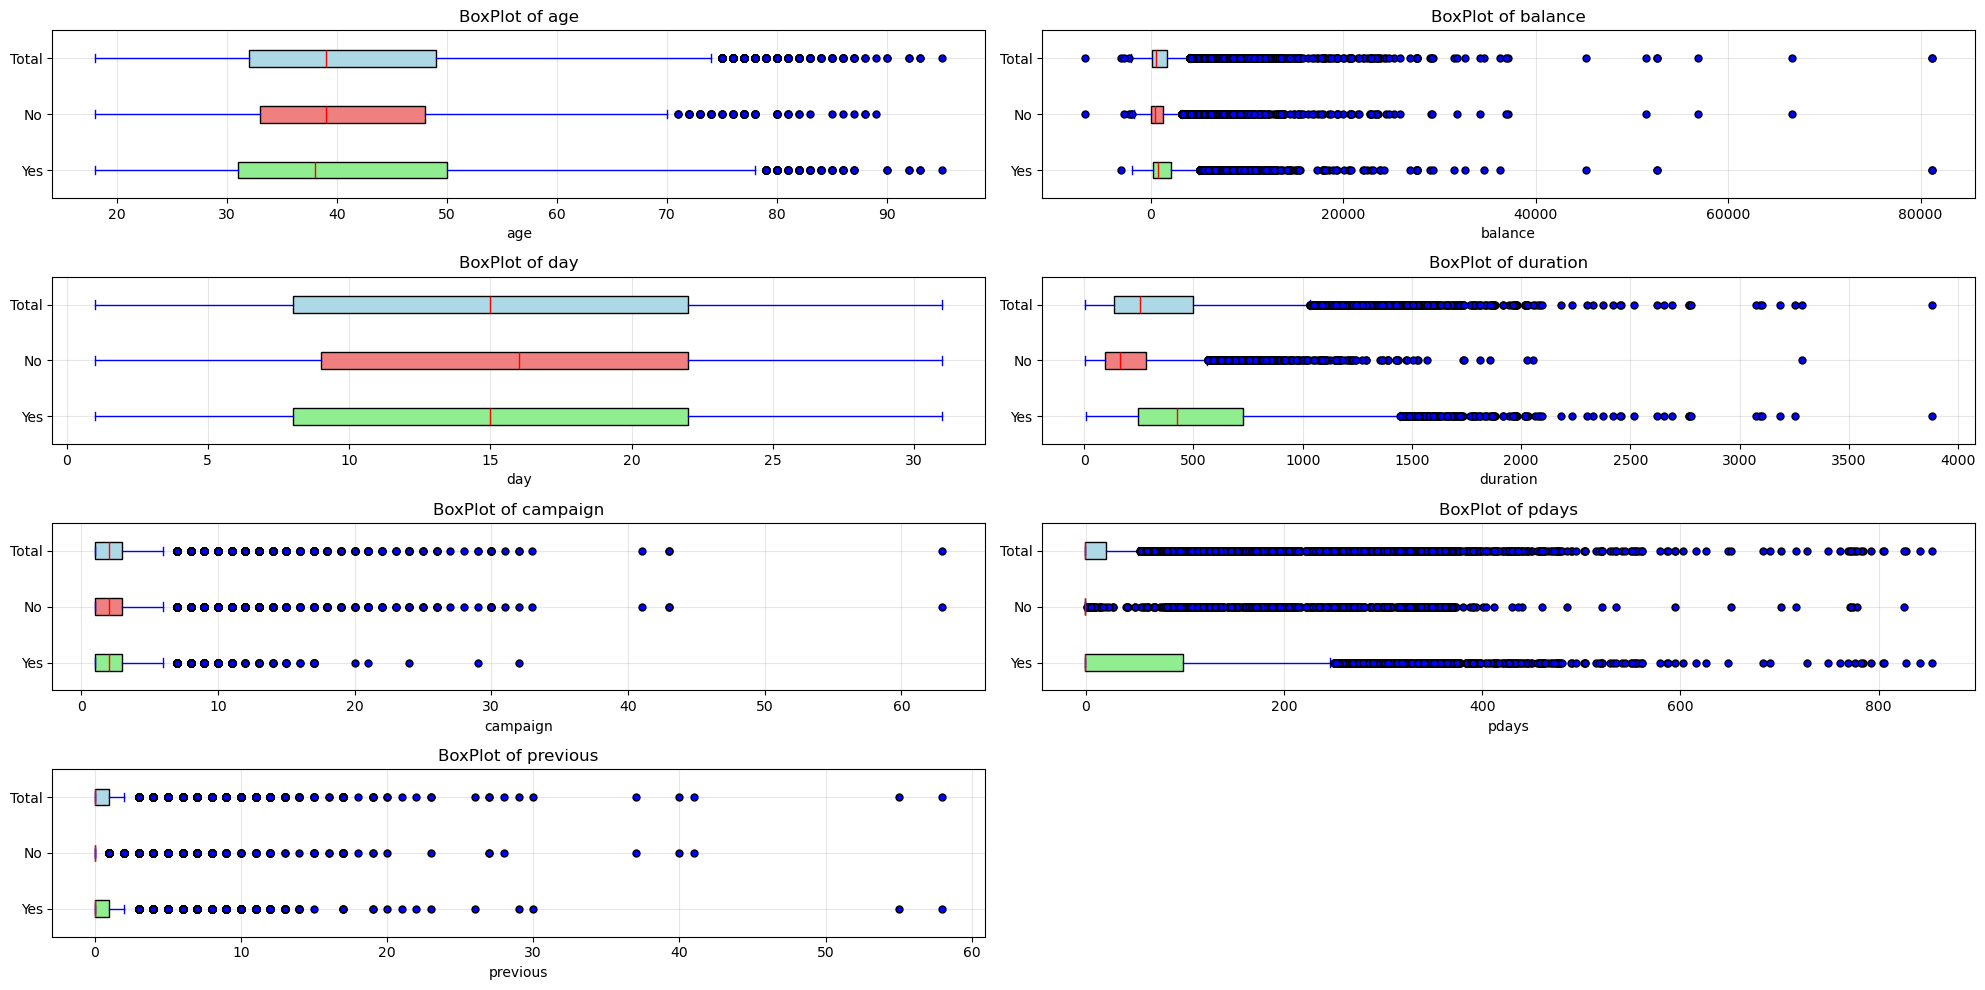

In [47]:
data.vis(df)

# üßπ Pr√©-Processamento dos Dados

In [48]:
# Aplicar pr√©-processamento
df = data.preposessing(df)

# print(df)
# print(df.describe())
# df.to_csv('AA_TP1/Data/bank_preprocessed.csv', index=False)

# ‚úÇÔ∏è Divis√£o dos Dados em Treino e Teste

In [49]:
# Criar divis√£o estratificada dos dados
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=5)

for train_index, test_index in split.split(df, df['deposit']):
    train = df.loc[train_index]
    test = df.loc[test_index]

# Exibir a propor√ß√£o dos dep√≥sitos em cada conjunto
print("Propor√ß√£o no conjunto de treino:")
print(train['deposit'].value_counts() / train.shape[0])

print("\nPropor√ß√£o no conjunto de teste:")
print(test['deposit'].value_counts() / test.shape[0])

Propor√ß√£o no conjunto de treino:
deposit
0    0.526151
1    0.473849
Name: count, dtype: float64

Propor√ß√£o no conjunto de teste:
deposit
0    0.526198
1    0.473802
Name: count, dtype: float64


# üéØ Separa√ß√£o de Features (`X`) e R√≥tulo (`y`)

In [50]:
# Separar features e r√≥tulo no treino
X_train = train.drop(columns=['deposit'])
y_train = train['deposit']

# Separar features e r√≥tulo no teste
X_test = test.drop(columns=['deposit'])
y_test = test['deposit']

# üìè Normaliza√ß√£o dos Dados

In [51]:
# Inicializar o normalizador
scaler = StandardScaler()

# Ajustar e transformar os dados
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ü§ñ Treinamento do Modelo

In [52]:
# Chamar fun√ß√£o de treino da rede neural
treino.rede_neural2(X_train, y_train, X_test, y_test)

32
√âpoca 0: Loss = 1.3142
√âpoca 100: Loss = 0.7777
√âpoca 200: Loss = 0.7314
√âpoca 300: Loss = 0.7148
√âpoca 400: Loss = 0.7008
√âpoca 500: Loss = 0.6883
√âpoca 600: Loss = 0.6770
√âpoca 700: Loss = 0.6665
√âpoca 800: Loss = 0.6567
√âpoca 900: Loss = 0.6475
√âpoca 1000: Loss = 0.6386
√âpoca 1100: Loss = 0.6302
√âpoca 1200: Loss = 0.6221
√âpoca 1300: Loss = 0.6143
√âpoca 1400: Loss = 0.6067
√âpoca 1500: Loss = 0.5993
√âpoca 1600: Loss = 0.5922
√âpoca 1700: Loss = 0.5854
√âpoca 1800: Loss = 0.5788
√âpoca 1900: Loss = 0.5724
√âpoca 2000: Loss = 0.5663
√âpoca 2100: Loss = 0.5604
√âpoca 2200: Loss = 0.5548
√âpoca 2300: Loss = 0.5494
√âpoca 2400: Loss = 0.5443
√âpoca 2500: Loss = 0.5394
√âpoca 2600: Loss = 0.5348
√âpoca 2700: Loss = 0.5304
√âpoca 2800: Loss = 0.5262
√âpoca 2900: Loss = 0.5222
√âpoca 3000: Loss = 0.5185
√âpoca 3100: Loss = 0.5149
√âpoca 3200: Loss = 0.5116
√âpoca 3300: Loss = 0.5084
√âpoca 3400: Loss = 0.5054
√âpoca 3500: Loss = 0.5026
√âpoca 3600: Loss = 0.4999
√âpoca 370